In [37]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt
import statsmodels.formula.api as sm

In [66]:
train=pd.read_csv("HR_Analytics.csv.csv")
train_num = train.copy()
train_num.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- Age: The age of the employee. (Numerical)
- Attrition: Whether or not the employee has left the organization. (Categorical)
- BusinessTravel: The frequency of business travel for the employee. (Categorical)
- DailyRate: The daily rate of pay for the employee. (Numerical)
- Department: The department the employee works in. (Categorical)
- DistanceFromHome: The distance from home in miles for the employee. (Numerical)
- Education: The level of education achieved by the employee. (Categorical)
- EducationField: The field of study for the employee's education. (Categorical)
- EmployeeCount: The total number of employees in the organization. (Numerical)
- EmployeeNumber: A unique identifier for each employee profile. (Numerical)
- EnvironmentSatisfaction: The employee's satisfaction with their work environment. (Categorical)
- Gender: The gender of the employee. (Categorical)
- HourlyRate: The hourly rate of pay for the employee. (Numerical)
- JobInvolvement: The level of involvement required for the employee's job. (Categorical)
- JobLevel: The job level of the employee. (Categorical)
- JobRole: The role of the employee in the organization. (Categorical)
- JobSatisfaction: The employee's satisfaction with their job. (Categorical)
- MaritalStatus: The marital status of the employee. (Categorical)
- MonthlyIncome: The monthly income of the employee. (Numerical)
- MonthlyRate: The monthly rate of pay for the employee. (Numerical)
- NumCompaniesWorked: The number of companies the employee has worked for. (Numerical)
- Over18: Whether or not the employee is over 18. (Categorical)
- OverTime: Whether or not the employee works overtime. (Categorical)
- PercentSalaryHike: The percentage of salary hike for the employee. (Numerical)
- PerformanceRating: The performance rating of the employee. (Categorical)
- RelationshipSatisfaction: The employee's satisfaction with their relationships. (Categorical)
- StandardHours: The standard hours of work for the employee. (Numerical)
- StockOptionLevel: The stock option level of the employee. (Numerical)
- TotalWorkingYears: The total number of years the employee has worked. (Numerical)
- TrainingTimesLastYear: The number of times the employee was taken for training in the last year. (Numerical)
- WorkLifeBalance: The employee's perception of their work-life balance. (Categorical)
- YearsAtCompany: The number of years the employee has been with the company. (Numerical)
- YearsInCurrentRole: The number of years the employee has been in their current role. (Numerical)
- YearsSinceLastPromotion: The number of years since the employee's last promotion. (Numerical)
- YearsWithCurrManager: The number of years the employee has been with their current manager. (Numerical)

- make people who leave the job 1 (bc there are far less of them)
- min false neg rate to maximizew recall 
- precision recall is a good metric to optimize (most imp recall)
- minimize ppl who will leave

In [39]:


train_num.columns = train_num.columns.str.replace(' ', '_')
# Attrition = 1 if left org (if yes)
train_num['Attrition'] = train_num['Attrition'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
# BusinessTravel = 3 if Travel_Frequently, 2 if Travel_Rarely, 1 if no travel
train_num['BusinessTravel'] = train_num['BusinessTravel'].apply(
    lambda x: 3 if x=='Travel_Frequently' else 2 if x == 'Travel_Rarely' else 1)
# Department = 3 for R&D, 2 for Sales, and 1 for HR
train_num['Department'] = train_num['Department'].apply(
    lambda x: 3 if x=='Research & Development' else 2 if x == 'Sales' else 1)
# different numbers assigned to every field, 1 = Human Resources
train_num['EducationField'] = train_num['EducationField'].apply(
    lambda x: 6 if x=='Life Sciences' else 5 if x == 'Medical' else 4 if x == 'Marketing' 
    else 3 if x == 'Technical Degree' else 2 if x == 'Other' else 1)
# Gender = 1 if male, 0 if female
train_num['Gender'] = train_num['Gender'].apply(lambda x: 1 if x=='Male' else 0)
# diff num for diff job roles, 1 = Human Resources
train_num['JobRole'] = train_num['JobRole'].apply(
    lambda x: 9 if x=='Sales Executive' else 8 if x == 'Research Scientist' else 7 if x == 'Laboratory Technician' 
    else 6 if x == 'Manufacturing Director' else 5 if x == 'Healthcare Representative' else 4 if x == 'Manager' 
    else 3 if x == 'Sales Representative' else 2 if x == 'Research Director' else 1)
# MaritalStatus = 1 if Divorced
train_num['MaritalStatus'] = train_num['MaritalStatus'].apply(
    lambda x: 3 if x=='Married' else 2 if x == 'Single' else 1)
# Over18 everyone is over 18
train_num['Over18'] = train_num['Over18'].apply(lambda x: 1 if x=='Y' else 0)
# OverTime = 1 if Yes, 0 if no
train_num['OverTime'] = train_num['OverTime'].apply(lambda x: 1 if x=='Yes' else 0) #1 if left org
train_num.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,6,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,3,279,3,8,1,6,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,3,2,2,2,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,3,1392,3,3,4,6,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,3,2,1,5,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
train_num.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Text(0, 0.5, 'MonthlyIncome')

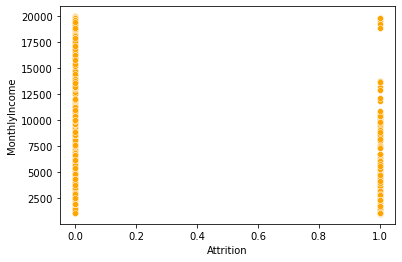

In [64]:
sns.scatterplot(x = train_num.Attrition, y = train_num.MonthlyIncome, color = 'orange')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')

In [55]:
ols_object = smf.ols(formula = 'Attrition~DailyRate + Age + MonthlyIncome', data = train_num)
model = ols_object.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     18.76
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.09e-12
Time:                        18:33:58   Log-Likelihood:                -587.59
No. Observations:                1470   AIC:                             1183.
Df Residuals:                    1466   BIC:                             1204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4123      0.044      9.395      0.000       0.326       0.498
DailyRate     -4.987e-05   2.34e-05     -2.134      0.033   -9.57e-05   -4.03e-06
Age              -0.0042      0.001     -3.565      0.000      -0.007      -0.002
MonthlyIncome -8.357e-06   2.31e-06     -3.619      0.000   -1.29e-05   -3.83e-06
==============================================================================
Omnibus:                      415.733   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              842.311
Skew:                           1.741   Prob(JB):                    1.24e-183
Kurtosis:                       4.274   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
train2=pd.read_csv("Hotel Reservations.csv")
train2_num = train2.copy()
train2_num.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [61]:
train2_num['booking_status'] = train2_num['booking_status'].apply(lambda x: 1 if x=='Not_Canceled' else 0) #1 if not calcelled

In [63]:
train2_num.corrwith(train2_num.booking_status).sort_values(ascending = False)

booking_status                          1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
dtype: float64